In [1]:
source("/ahg/regevdata/users/jklugham/projects/HTAPP_MBC/src/init.R")
library("LiblineaR")
library("randomForest")
library("genefu")

Loading required package: cowplot

Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave

Loading required package: Matrix
Loading combined annotation: annot
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

Loading required package: survcomp
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.5.1"Loading required package: prodlim
Loading required package: mclust
Package 'mclust' version 5.4.2
Type 'citation("mclust")' for citing this R package in publications.
Loading required package: limma
Loading required package: biomaRt
Loading required package: iC10
Loading required package: pamr
Loading required package: cluster
Warning message:
"package 'cluster' was built under R version 3.5.1"Loading required package: iC10TrainingData
Loading required package: AIMS
Loading requ

In [2]:
wd=file.path(analysisDir,"00_spatial_probes")
dir.create(wd)
setwd(wd)

Warning message in dir.create(wd):
"'/ahg/regevdata/projects/HTAPP_MBC//analysis//00_spatial_probes' already exists"

In [3]:
cell_types=c("Epithelial_cells","Epithelial_stem","Fibroblasts","Endothelial_cells","Macrophage","Monocyte","NK_cell","T_cells","B_cell","Plasma_cell")

In [4]:
simpleCache(cacheName = "fresh_combined",
            instruction = "", 
            cacheDir = cacheDir, 
            cacheSubDir = "combined_seurat", 
            recreate = FALSE,assignToVariable = "cs")

Warning message in simpleCache(cacheName = "fresh_combined", instruction = "", cacheDir = cacheDir, :
"Detected a character instruction; consider wrapping in {} instead ofquotes."::Loading cache::	/ahg/regevdata/projects/HTAPP_MBC//RCache//combined_seurat/fresh_combined.RData


### Add meta data

In [5]:
cond=rbindlist(lapply(strsplit(row.names(cs@meta.data),"_"),
                      function(x){data.frame(rbind(c(paste(x,collapse = "_"),x[c(1,2,3)])))}))
setnames(cond,names(cond),c("cellid","sampleID","condition","channel"))

In [6]:
cond_an=merge(cond,unique(annot[,c("sampleid","site","receptors_biopsy","site_biopsy","histology_breast2"),]),by.x="sampleID",by.y="sampleid")
cond_an=data.frame(cond_an,row.names = which(colnames(cond_an)=="cellid"))
head(cond_an)

,sampleID,condition,channel,site,receptors_biopsy,site_biopsy,histology_breast2
HTAPP-252-SMP-541_fresh_channel1_AAGGTTCTCCTGCAGG-1,HTAPP-252-SMP-541,fresh,channel1,left breast,ER+/PR+/HER2-,Breast,Invasive lobular carcinoma
HTAPP-252-SMP-541_fresh_channel1_ACAGCCGGTACCGTAT-1,HTAPP-252-SMP-541,fresh,channel1,left breast,ER+/PR+/HER2-,Breast,Invasive lobular carcinoma
HTAPP-252-SMP-541_fresh_channel1_ACATACGAGACACGAC-1,HTAPP-252-SMP-541,fresh,channel1,left breast,ER+/PR+/HER2-,Breast,Invasive lobular carcinoma
HTAPP-252-SMP-541_fresh_channel1_ACGAGCCCAGGAATGC-1,HTAPP-252-SMP-541,fresh,channel1,left breast,ER+/PR+/HER2-,Breast,Invasive lobular carcinoma
HTAPP-252-SMP-541_fresh_channel1_ACGATGTAGTACGCCC-1,HTAPP-252-SMP-541,fresh,channel1,left breast,ER+/PR+/HER2-,Breast,Invasive lobular carcinoma
HTAPP-252-SMP-541_fresh_channel1_ACTTACTAGAATGTGT-1,HTAPP-252-SMP-541,fresh,channel1,left breast,ER+/PR+/HER2-,Breast,Invasive lobular carcinoma


In [7]:
cs=AddMetaData(cs,metadata = cond_an)

In [8]:
sort(table(cs@meta.data$labels))


                  BM            Myelocyte          Osteoblasts 
                   1                    1                    1 
         Neutrophils           HSC_-G-CSF        Keratinocytes 
                   2                    5                    5 
           Platelets        Pro-Myelocyte            Astrocyte 
                   8                    9                   24 
          BM & Prog.                  MSC                  MEP 
                  29                   47                   98 
                 GMP  Smooth_muscle_cells     Pro-B_cell_CD34+ 
                 107                  230                  235 
         Hepatocytes         Erythroblast                   DC 
                 253                  268                  296 
                 CMP Embryonic_stem_cells    Tissue_stem_cells 
                 312                  331                  352 
    Pre-B_cell_CD34-              Neurons         Chondrocytes 
                 375                  4

In [33]:
#discriminate between b-cells and plasma cells and rename iPS cells
lab_dt=as.data.table(cs@meta.data[,c("labels","labels_detail")],keep.rownames = "cellid")
lab_dt[,labels_mod:=ifelse(labels=="B_cell"&labels_detail=="B_cell:Plasma_cell","Plasma_cell",labels),]
lab_dt[,labels_mod:=ifelse(labels%in%c("iPS_cells"),"Epithelial_stem",labels_mod),]
setnames(lab_dt,c("labels","labels_mod"),c("labels_orig","labels"))
lab_df=data.frame(lab_dt,row.names = "cellid")

In [34]:
cs=AddMetaData(cs,metadata = lab_df)

In [11]:
cs=FindClusters(object = cs, reduction.type = "pca", dims.use = 1:10, resolution = 0.6, print.output = 0)

In [12]:
cs=SetIdent(cs,ident.use = cs@meta.data$labels)

#### Add Subtyping pam50 model

In [13]:
dat=t(cs@data)
#dat=t(apply(dat,1,function(x){log2(x/sum(x)*10000+1)})) # weirdly apply undoes the previous t()

In [14]:
rownames(pam50$centroids)[!rownames(pam50$centroids)%in%colnames(dat)]

[1] "CDCA1" "KNTC2" "ORC6L"

Some gene names don't match between pam50 and scRNAseq data
CDCA1=NUF2
KNTC2=NDC80
ORC6L=ORC6

In [15]:
pam50_gene=rownames(pam50$centroids)
pam50_gene[pam50_gene=="CDCA1"]="NUF2"
pam50_gene[pam50_gene=="KNTC2"]="NDC80"
pam50_gene[pam50_gene=="ORC6L"]="ORC6"

In [16]:
colnames(dat)[colnames(dat)=="NUF2"]="CDCA1"
colnames(dat)[colnames(dat)=="NDC80"]="KNTC2"
colnames(dat)[colnames(dat)=="ORC6"]="ORC6L"
gene_annot=data.frame(Gene.Symbol=colnames(dat))

In [17]:
oldw <- getOption("warn")
options(warn=-1)
mst=molecular.subtyping(sbt.model="pam50",data=dat,annot = gene_annot )
options(warn=oldw)

In [18]:
mst_dt=as.data.table(mst$subtype.proba,keep.rownames = "cellid")

In [19]:
mst_dt[,subtype:=c("Basal","Her2","LumA","LumB","Normal")[which.max(c(Basal,Her2,LumA,LumB,Normal))],by=1:nrow(mst_dt)]
mst_dt[,subtype_prob:=max(c(Basal,Her2,LumA,LumB,Normal)),by=1:nrow(mst_dt)]

In [20]:
mst_dt[,subtype_filt:=ifelse(subtype_prob<0.6|is.na(subtype_prob),"unknown",subtype),]

In [21]:
mst_df=data.frame(mst_dt,row.names = "cellid")
head(mst_df)
table(mst_df$subtype_filt=="unknown")

,Basal,Her2,LumA,LumB,Normal,subtype,subtype_prob,subtype_filt
HTAPP-382-SMP-1441_fresh_channel1_AAACCTGCATGTTCCC-1,0,0.0000000,0.68816815,0.0000000,0.3118319,LumA,0.6881681,LumA
HTAPP-382-SMP-1441_fresh_channel1_AAACGGGTCTGTTTGT-1,0,0.0000000,0.63265306,0.1836735,0.1836735,LumA,0.6326531,LumA
HTAPP-382-SMP-1441_fresh_channel1_AAAGATGAGCCTTGAT-1,0,0.7021277,0.06382979,0.2340426,0.0000000,Her2,0.7021277,Her2
HTAPP-382-SMP-1441_fresh_channel1_AAAGCAAAGGAGTTTA-1,NA,NA,NA,NA,NA,NA,NA,unknown
HTAPP-382-SMP-1441_fresh_channel1_AAAGCAACATCGATGT-1,NA,NA,NA,NA,NA,NA,NA,unknown
HTAPP-382-SMP-1441_fresh_channel1_AAAGTAGGTTGAGTTC-1,0,0.0000000,0.67241379,0.0000000,0.3275862,LumA,0.6724138,LumA



FALSE  TRUE 
26145 35317 

In [22]:
cs=AddMetaData(cs,metadata = mst_df)

#### Metadata overview

In [23]:
md=as.data.table(cs@meta.data,keep.rownames = "cellid")
head(md)

cellid,nGene,nUMI,orig.ident,percent.mito,res.1,res.0.8,labels_detail,pval_detail,score_detail,rel_score_detail,N_labels_detail,labels,pval,score,rel_score,N_labels,S.Score,G2M.Score,Phase,mean_cn_up,mean_cn_dn,rel_up,rel_dn,rel_n,N_cnv_genes,sampleID,condition,channel,site,receptors_biopsy,site_biopsy,histology_breast2,labels_orig,res.0.6,Basal,Her2,LumA,LumB,Normal,subtype,subtype_prob,subtype_filt
HTAPP-382-SMP-1441_fresh_channel1_AAACCTGCATGTTCCC-1,3157,11457,HTAPP-382-SMP-1441_fresh_channel1,0.01972593,22,0,Chondrocytes:MSC-derived,0.01465446,0.4659225,0.011152342,168,Chondrocytes,0.03963268,0.4930907,0.05137847,306,0.03961997,-0.05267058,S,1.409756,0.5500387,0.04697544,0.05060162,0.9024229,6067,HTAPP-382-SMP-1441,fresh,channel1,bone,ER+/PR+/HER2-,Bone,Unknown,Chondrocytes,10,0,0.0000000,0.68816815,0.0000000,0.3118319,LumA,0.6881681,LumA
HTAPP-382-SMP-1441_fresh_channel1_AAACGGGTCTGTTTGT-1,3154,10612,HTAPP-382-SMP-1441_fresh_channel1,0.01620807,22,0,Osteoblasts,0.01626313,0.4605355,0.010798577,132,Chondrocytes,0.04447381,0.4774789,0.04910392,306,0.04237766,-0.03970547,S,1.421337,0.5254794,0.05587605,0.05538157,0.8887424,6067,HTAPP-382-SMP-1441,fresh,channel1,bone,ER+/PR+/HER2-,Bone,Unknown,Chondrocytes,10,0,0.0000000,0.63265306,0.1836735,0.1836735,LumA,0.6326531,LumA
HTAPP-382-SMP-1441_fresh_channel1_AAAGATGAGCCTTGAT-1,1639,3638,HTAPP-382-SMP-1441_fresh_channel1,0.02666300,22,0,Chondrocytes:MSC-derived,0.01589559,0.3752946,0.011398879,168,Chondrocytes,0.03430163,0.3997520,0.05431747,306,-0.02746802,-0.03931816,G1,1.460664,0.4856809,0.08653371,0.09065436,0.8228119,6067,HTAPP-382-SMP-1441,fresh,channel1,bone,ER+/PR+/HER2-,Bone,Unknown,Chondrocytes,10,0,0.7021277,0.06382979,0.2340426,0.0000000,Her2,0.7021277,Her2
HTAPP-382-SMP-1441_fresh_channel1_AAAGCAAAGGAGTTTA-1,752,1471,HTAPP-382-SMP-1441_fresh_channel1,0.04418763,22,3,Chondrocytes:MSC-derived,0.02057913,0.2963938,0.012182823,168,Chondrocytes,0.03644891,0.3115081,0.05880106,306,-0.03240417,-0.00740917,G1,1.502221,0.5420725,0.08587440,0.05900775,0.8551179,6067,HTAPP-382-SMP-1441,fresh,channel1,bone,ER+/PR+/HER2-,Bone,Unknown,Chondrocytes,10,NA,NA,NA,NA,NA,NA,NA,unknown
HTAPP-382-SMP-1441_fresh_channel1_AAAGCAACATCGATGT-1,1198,2419,HTAPP-382-SMP-1441_fresh_channel1,0.02976437,0,1,T_cell:CD4+_effector_memory,0.05718201,0.3287972,0.009392191,72,T_cells,0.04879731,0.3201432,0.04018873,94,-0.01743879,0.03319632,G2M,1.484035,0.4915710,0.04038240,0.03313005,0.9264876,6067,HTAPP-382-SMP-1441,fresh,channel1,bone,ER+/PR+/HER2-,Bone,Unknown,T_cells,1,NA,NA,NA,NA,NA,NA,NA,unknown
HTAPP-382-SMP-1441_fresh_channel1_AAAGTAGGTTGAGTTC-1,1448,4449,HTAPP-382-SMP-1441_fresh_channel1,0.01033940,10,2,Monocyte:anti-FcgRIIB,0.06642966,0.3726556,0.009234216,1,Monocyte,0.04053930,0.3846036,0.03987123,44,-0.05380274,-0.02084182,G1,1.433013,0.5236934,0.05043679,0.06543597,0.8841272,6067,HTAPP-382-SMP-1441,fresh,channel1,bone,ER+/PR+/HER2-,Bone,Unknown,Monocyte,11,0,0.0000000,0.67241379,0.0000000,0.3275862,LumA,0.6724138,LumA


### Data overview

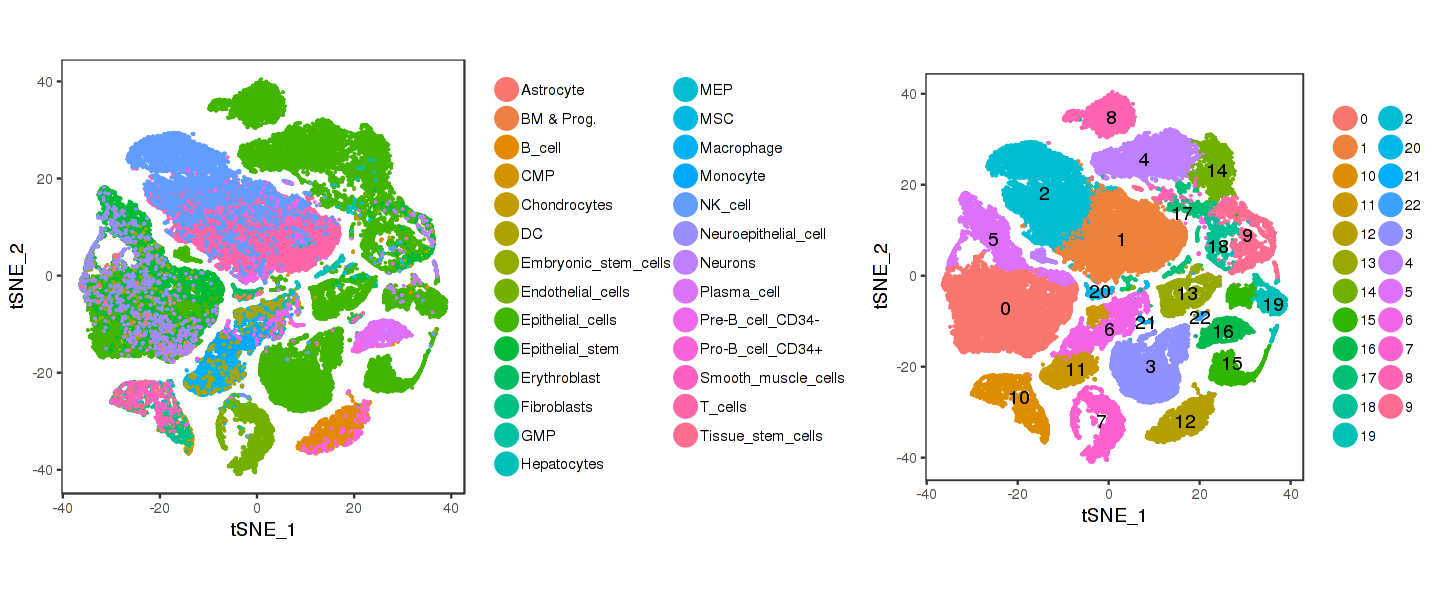

In [35]:
options(repr.plot.width = 12, repr.plot.height = 5)
p1=TSNEPlot(SubsetData(cs,subset.name = "N_labels",accept.low = 10),coord.fixed=TRUE,do.label=FALSE,group.by="labels",pt.size = 0.01,do.return=TRUE)
p2=TSNEPlot(cs,do.label=TRUE,group.by="res.0.6",coord.fixed=TRUE,pt.size = 0.01,do.return=TRUE)
plot_grid(p1,p2,rel_widths = c(3,2),ncol=2)

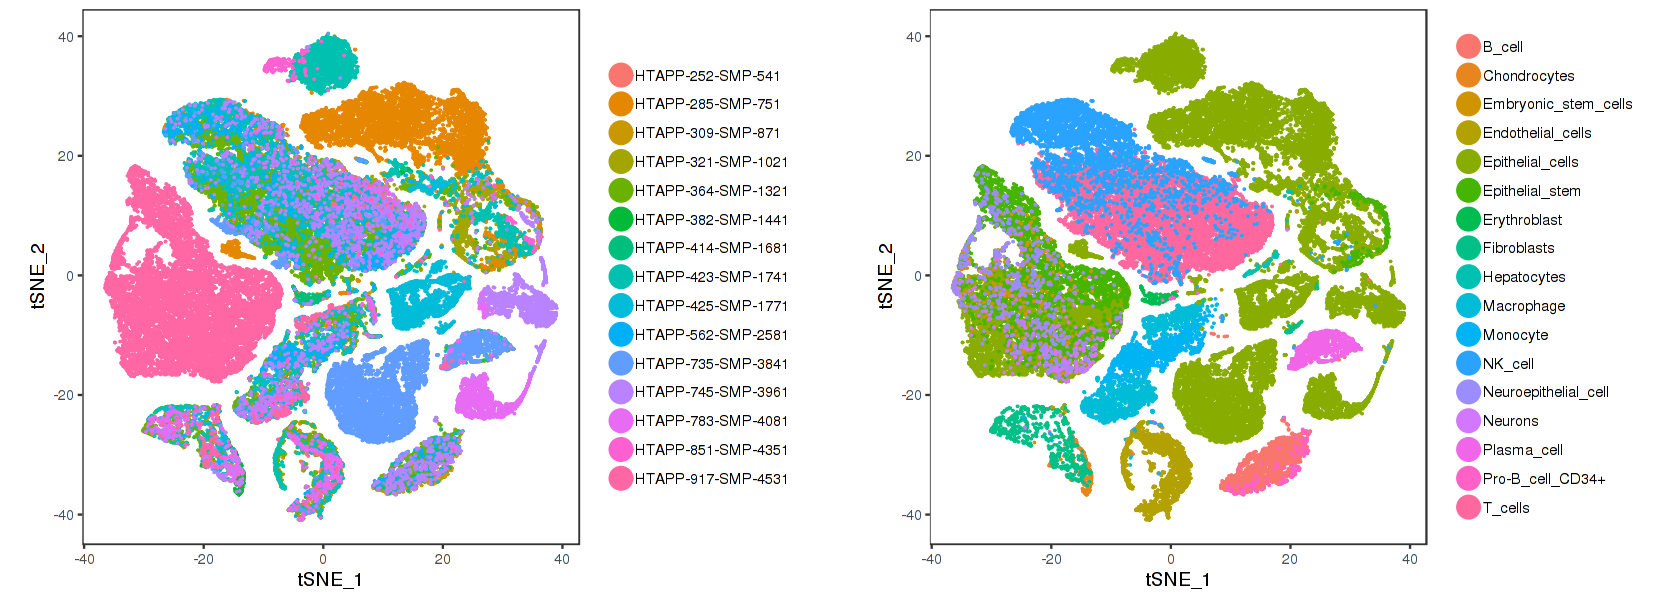

In [36]:
options(repr.plot.width = 14, repr.plot.height = 5)
p1=TSNEPlot(cs,do.label=FALSE,group.by="sampleID",coord.fixed=TRUE,pt.size = 0.01,do.return=TRUE)
p2=TSNEPlot(SubsetData(cs,subset.name = "N_labels",accept.low = 100),do.label=FALSE,group.by="labels",coord.fixed=TRUE,pt.size = 0.01,do.return=TRUE)
plot_grid(p1,p2,rel_widths = c(1,1),ncol=2)

Warning message:
"Removed 2 rows containing missing values (geom_point)."

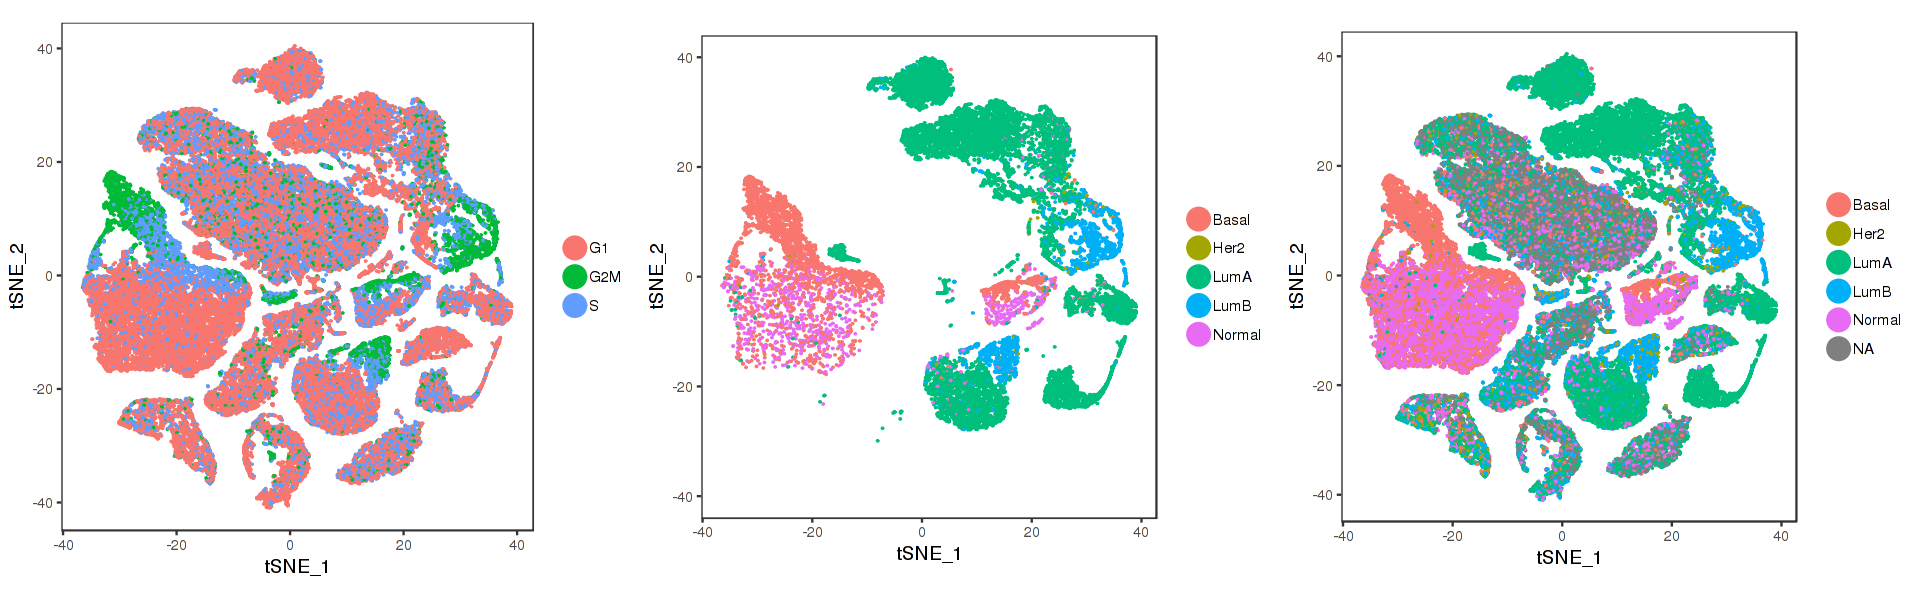

In [30]:
options(repr.plot.width = 16, repr.plot.height = 5)
p1=TSNEPlot(cs,do.label=FALSE,group.by="Phase",coord.fixed=TRUE,pt.size = 0.01,do.return=TRUE)
#p2=TSNEPlot(cs,do.label=FALSE,group.by="subtype_filt",coord.fixed=TRUE,pt.size = 0.01,do.return=TRUE)
p2=TSNEPlot(SubsetData(SubsetData(cs,subset.name = "labels",accept.value = c("Epithelial_cells","Epithelial_stem")),subset.name = "subtype_filt",accept.value = c("Basal","Her2","LumA","LumB","Normal")),do.label=FALSE,group.by="subtype_filt",coord.fixed=TRUE,pt.size = 0.01,do.return=TRUE)
p3=TSNEPlot(cs,do.label=FALSE,group.by="subtype",coord.fixed=TRUE,pt.size = 0.01,do.return=TRUE)
plot_grid(p1,p2+ylim(c(-40,40)),p3,ncol=3)

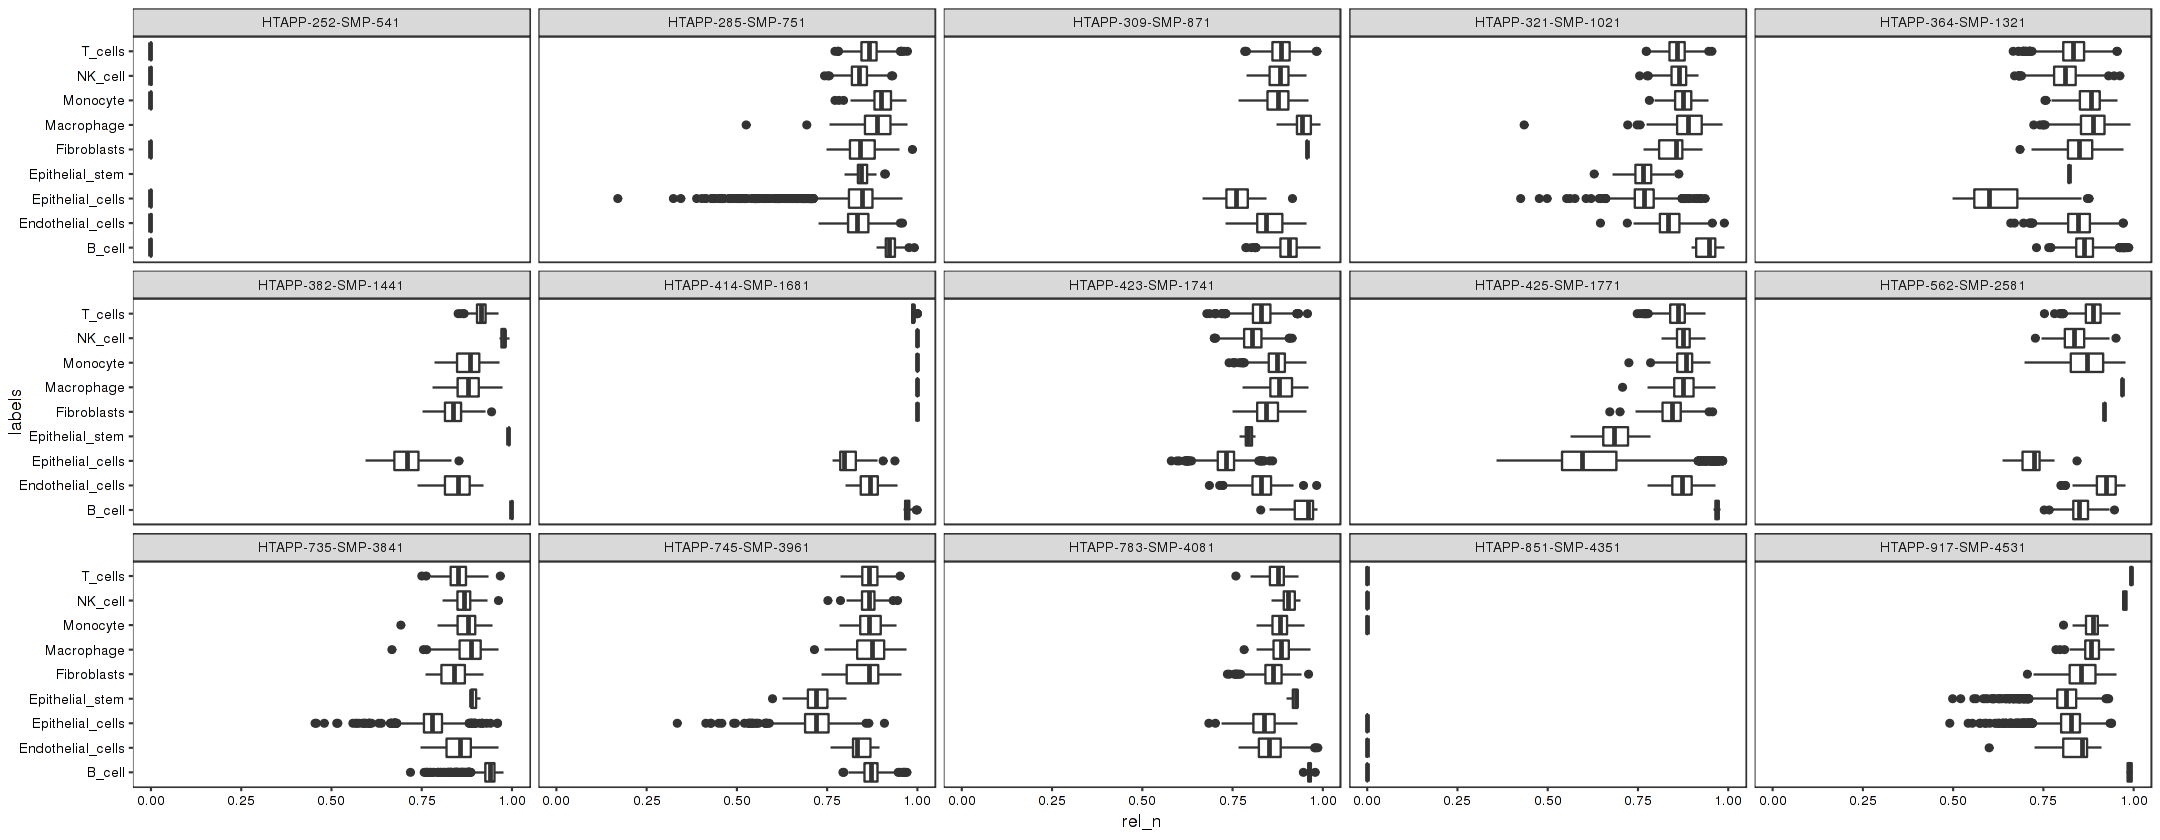

In [37]:
options(repr.plot.width = 18, repr.plot.height = 7)
ggplot(md[labels%in%c(cell_types,"Epithelial_stem")],aes(x=labels,y=rel_n,group=labels))+geom_boxplot()+facet_wrap(~sampleID,ncol=5)+coord_flip()

### Use machine leaning to find genes that discriminate groups

In [31]:
find_cla=function(obj,ident,ident_types=NULL,s_name, s_types,var_genes=NULL,n=200,wp=0.04,wc=NULL,seed = 1234,RF=FALSE,ng=NULL){
    obj=SetIdent(obj,ident.use = obj@meta.data[,ident])
    cells=WhichCells(obj,subset.name = s_name,accept.value = s_types)
    if (!is.null(ident_types)){
        cells_ident=WhichCells(obj,subset.name = ident,accept.value = ident_types)
        cells=cells[cells%in%cells_ident]
    }
    sub=SubsetData(obj,cells.use = cells,max.cells.per.ident = n,random.seed = seed,do.center = TRUE,do.scale = TRUE)
    p1=TSNEPlot(sub,coord.fixed=TRUE,do.label=FALSE,group.by=ident,pt.size = 0.01,do.return=TRUE)
            
    if (is.null(var_genes)){
        sub=FindVariableGenes(sub,do.plot = FALSE,y.cutoff = 0.5,x.low.cutoff = 0.1) #prev 0.5
    }else{
        sub@var.genes=var_genes
    }
    nv=length(sub@var.genes)
    nc=ncol(sub@scale.data)
    print(paste0("N variable genes: ", nv))
    print(paste0("N cells: ", nc))
    
    dat=t(sub@scale.data[sub@var.genes,])
    lab=sub@meta.data[,ident]
    
    if (RF==TRUE){
        rf=randomForest(dat,as.factor(lab))
        print(paste0("rf mean error rate = ",signif(mean(rf$err.rate),3)))
    }
    c=heuristicC(dat)
    set.seed(1234)
    ac=LiblineaR(dat,lab,cost = c,type = 5,cross=5)
    print(paste0("accuracy before filtering = ",signif(ac,3)))
    l=LiblineaR(dat,lab,cost = c,type = 5) 
    
    w_dt=melt(as.data.table(t(l$W),keep.rownames = "gene"),id.vars = "gene")
    w_dt=w_dt[gene!="Bias"]
    w_dt[,value_norm:=abs(value)/sum(abs(value)),by=variable]
    w_dt[,rank:=rank(-abs(value),ties.method = "random"),by=variable]
    w_dt=w_dt[order(-abs(value))]
    w_dt[,value_norm_cs:=cumsum(value_norm),by=variable]
    w_dt[,direction:=ifelse(value>0,"+","-"),]
    w_dt[,tot_weight:=sum(abs(value)),by="gene"]

   
    if (!is.null(ng)){
        #maximum weight selection
        w_dt_red=w_dt[,.SD[which.max(abs(value))],by=gene]
        w_dt_filt=w_dt_red[order(tot_weight,decreasing=TRUE)][1:ng]
    }else if (!is.null(wc)){
        #filter by max cum weight
        w_dt_filt=w_dt[value_norm_cs<wc]}else{
        #filter by min weight
        w_dt_filt=w_dt[abs(value_norm)>wp|rank<=5]    
    }

    w_dt_filt=w_dt_filt[,.SD[order(direction,-value_norm)][1],by="gene"]
    w_dt_filt=w_dt_filt[order(as.character(variable),value_norm)]
    
    
    n_genes=w_dt_filt[direction=="-"]$gene
    p_genes=w_dt_filt[direction=="+"]$gene
    
    sel_genes=c(p_genes,n_genes)
    
    dat_filt=dat[,colnames(dat)%in%sel_genes]
    c=heuristicC(dat_filt)
    set.seed(1234)
    ac_filt=LiblineaR(dat_filt,lab,cost = c,type = 5,cross=5)
    print(paste0("accuracy after filtering = ",signif(ac_filt,3)))

    
    sub2=SubsetData(obj,cells.use = cells,max.cells.per.ident = n,random.seed = 2345,do.center = TRUE,do.scale = TRUE)
    dat2=t(sub2@scale.data)
    dat2=dat2[,colnames(dat2)%in%sel_genes]
    lab2=sub2@meta.data[,ident]
    c=heuristicC(dat2)
    ac2=LiblineaR(dat2,lab2,cost = c,type = 5,cross=5)
    print(paste0("accuracy after filtering and different data = ",signif(ac2,3)))
    same_cells=sum(rownames(dat2)%in%rownames(dat_filt))/nrow(dat2)
    print(paste0("% same cells = ",signif(same_cells,3)))
    
    p2=DoHeatmap(sub,group.cex = 6 ,slim.col.label = TRUE,group.label.rot = FALSE,do.plot = FALSE,
          draw.line = TRUE,genes.use = sel_genes,group.by = ident,cex.row = 5.5,cex.col = 0)

    cat(c("Neg. weight genes:",n_genes[!n_genes%in%p_genes]),sep = " ")
    cat(c("\nNumber of genes:",length(unique(w_dt_filt$gene))))
return=list(w=w_dt,w_filt=w_dt_filt,tsne=p1,hm=p2,p_genes=p_genes,n_genes=n_genes,wp=wp)
}

#### Cell type predictive genes

Scaling data matrix


[1] "N variable genes: 4673"
[1] "N cells: 2000"
[1] "rf mean error rate = 0.0943"
[1] "accuracy before filtering = 0.908"
[1] "accuracy after filtering = 0.926"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.908"
[1] "% same cells = 0.079"
Neg. weight genes: IFITM3 S1PR5 PLEK
Number of genes: 69

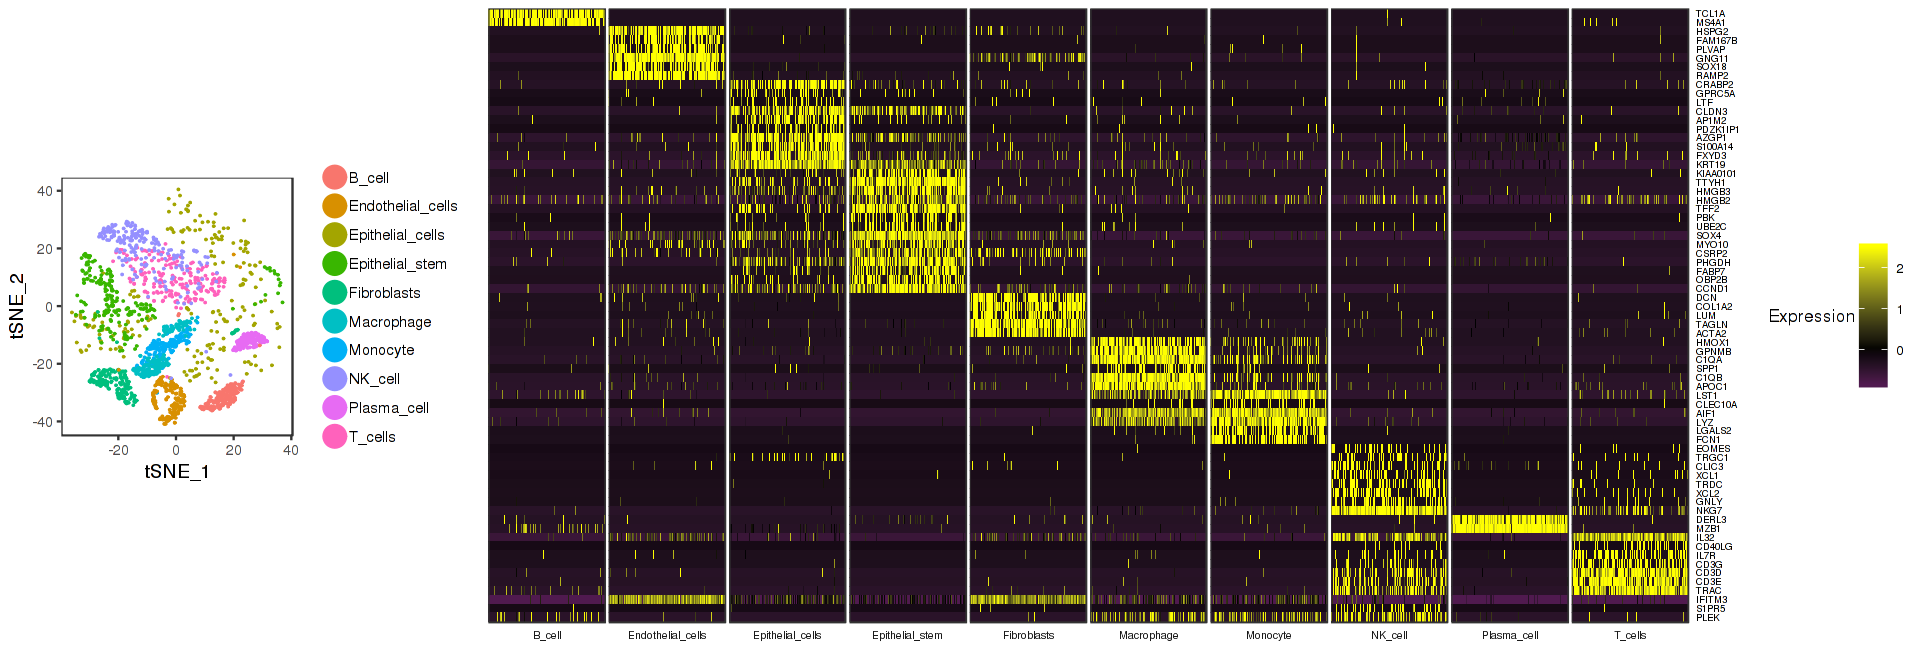

In [38]:
options(repr.plot.width = 16, repr.plot.height = 5.5)
cla_lab=find_cla(cs,ident = "labels",s_name = "labels",s_types = c(cell_types),wc=0.45,RF=T)
plot_grid(cla_lab$tsne,cla_lab$hm,rel_widths = c(1,3),ncol=2)

In [39]:
ct_weighted_genes=cla_lab$w_filt
ct_weighted_genes[value_norm_cs<=0.35,priority:=1]
ct_weighted_genes[value_norm_cs>0.35,priority:=tot_weight/max(tot_weight)*0.9,]
ct_weighted_genes[,type:=paste0(variable,direction),]
ct_weighted_genes[,assay:="data_ct_fresh",]
head(ct_weighted_genes)
table(duplicated(ct_weighted_genes$gene))

gene,variable,value,value_norm,rank,value_norm_cs,direction,tot_weight,priority,type,assay
TCL1A,B_cell,0.18913791,0.20274336,2,0.4135358,+,0.21611930,0.9000000,B_cell+,data_ct_fresh
MS4A1,B_cell,0.19664684,0.21079244,1,0.2107924,+,0.21635989,1.0000000,B_cell+,data_ct_fresh
HSPG2,Endothelial_cells,0.04734000,0.04878195,6,0.4251032,+,0.04734000,0.1971411,Endothelial_cells+,data_ct_fresh
FAM167B,Endothelial_cells,0.05148293,0.05305108,5,0.3763212,+,0.05148293,0.2143938,Endothelial_cells+,data_ct_fresh
PLVAP,Endothelial_cells,0.05874830,0.06053774,4,0.3232702,+,0.05874830,1.0000000,Endothelial_cells+,data_ct_fresh
GNG11,Endothelial_cells,0.06009297,0.06192337,3,0.2627324,+,0.06009297,1.0000000,Endothelial_cells+,data_ct_fresh



FALSE 
   69 

In [40]:
write.table(ct_weighted_genes[,c("gene","type","priority","assay")],"data_ct.tsv",sep="\t",quote=FALSE,row.names=FALSE)

Scaling data matrix


[1] "N variable genes: 44"
[1] "N cells: 10000"
[1] "accuracy before filtering = 0.907"
[1] "accuracy after filtering = 0.907"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.91"
[1] "% same cells = 0.448"
Neg. weight genes:
Number of genes: 44

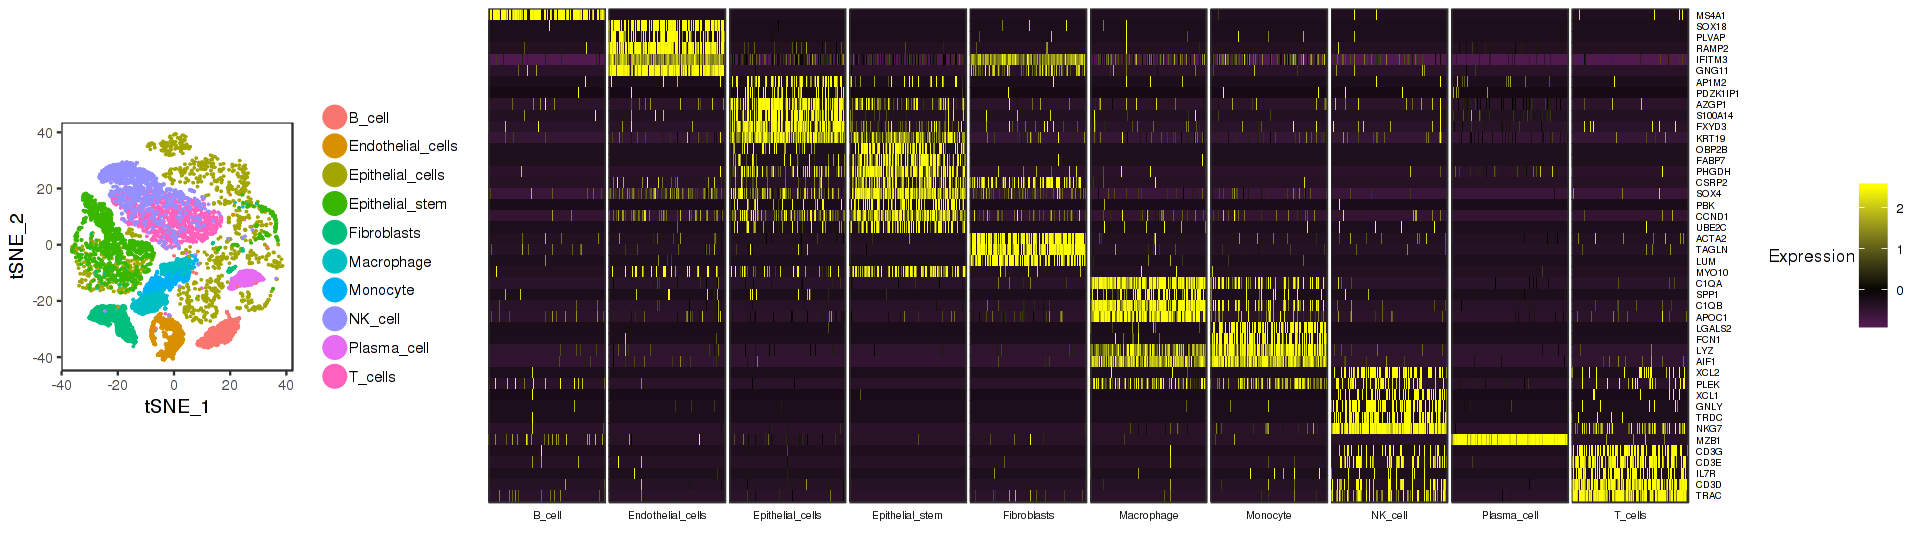

In [41]:
options(repr.plot.width = 16, repr.plot.height = 4.5)
cla_lab2=find_cla(cs,ident = "labels",s_name = "labels",s_types = cell_types,wc=1,n=1000,var_genes = ct_weighted_genes[priority==1]$gene)
plot_grid(cla_lab2$tsne,cla_lab2$hm,rel_widths = c(1,3),ncol=2)

In [42]:
cla_lab2=find_cla(cs,ident = "labels",s_name = "labels",s_types = cell_types,wc=1,n=1000,var_genes = ct_weighted_genes[priority>0.4]$gene)

Scaling data matrix


[1] "N variable genes: 47"
[1] "N cells: 10000"
[1] "accuracy before filtering = 0.913"
[1] "accuracy after filtering = 0.913"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.916"
[1] "% same cells = 0.448"
Neg. weight genes:
Number of genes: 47

In [43]:
cla_lab2=find_cla(cs,ident = "labels",s_name = "labels",s_types = cell_types,wc=1,n=1000,var_genes = ct_weighted_genes[priority>0.2]$gene)

Scaling data matrix


[1] "N variable genes: 55"
[1] "N cells: 10000"
[1] "accuracy before filtering = 0.915"
[1] "accuracy after filtering = 0.915"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.918"
[1] "% same cells = 0.448"
Neg. weight genes:
Number of genes: 55

In [44]:
cla_lab2=find_cla(cs,ident = "labels",s_name = "labels",s_types = cell_types,wc=1,n=1000,var_genes = ct_weighted_genes[priority>0]$gene)

Scaling data matrix


[1] "N variable genes: 69"
[1] "N cells: 10000"
[1] "accuracy before filtering = 0.92"
[1] "accuracy after filtering = 0.92"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.924"
[1] "% same cells = 0.448"
Neg. weight genes:
Number of genes: 69

#### Refinement of pam50 genes

Scaling data matrix


[1] "N variable genes: 50"
[1] "N cells: 889"
[1] "rf mean error rate = 0.119"
[1] "accuracy before filtering = 0.956"
[1] "accuracy after filtering = 0.956"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.938"
[1] "% same cells = 0.2"
Neg. weight genes: PGR
Number of genes: 50

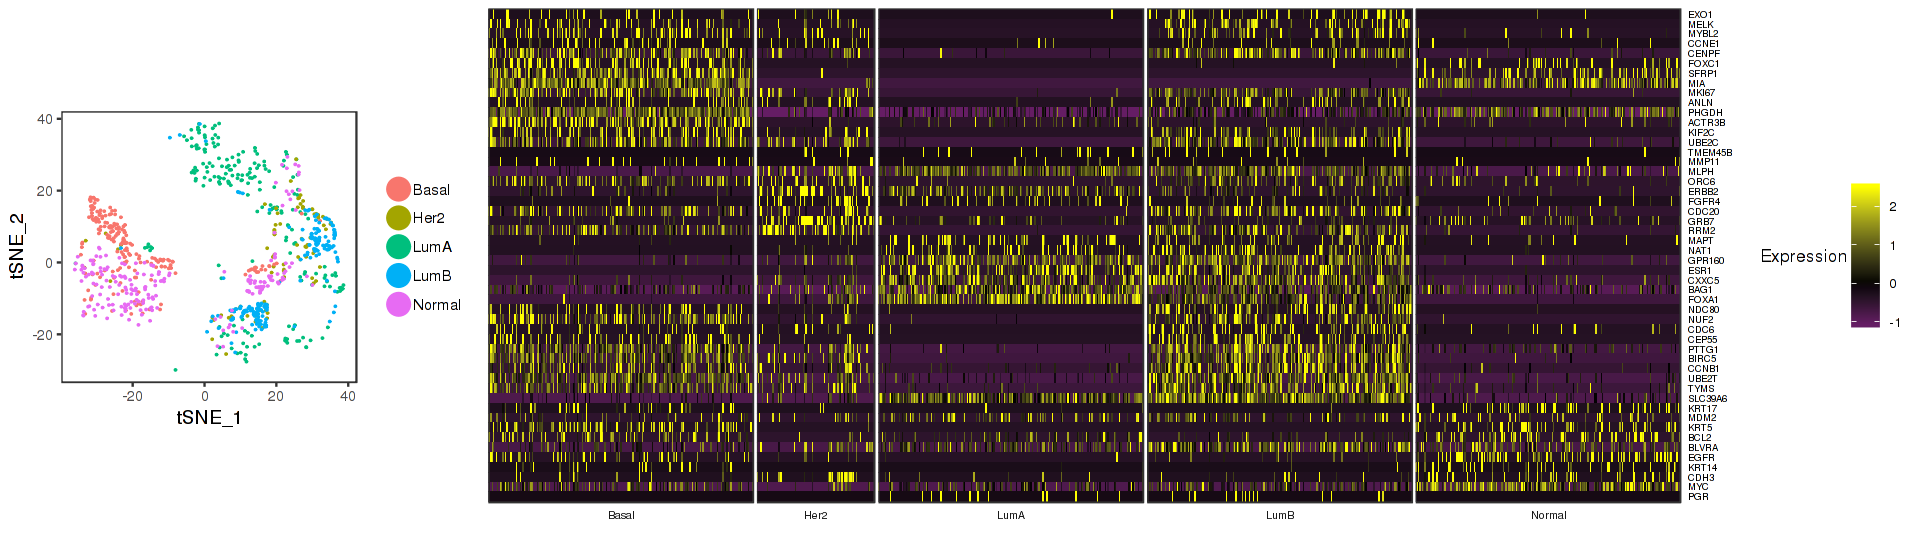

In [45]:
options(repr.plot.width = 16, repr.plot.height = 4.5)
cla_pam50=find_cla(cs,ident = "subtype_filt",ident_types=c("LumA","LumB","Her2","Basal","Normal"),s_name = "labels",s_types = c("Epithelial_cells","Epithelial_stem"),wc=1,RF=T,var_genes = pam50_gene)
plot_grid(cla_pam50$tsne,cla_pam50$hm,rel_widths = c(1,3),ncol=2)

In [46]:
pam50_weighted_genes=cla_pam50$w_filt
pam50_weighted_genes[value_norm_cs<=0.8,priority:=1]
pam50_weighted_genes[value_norm_cs>0.8,priority:=tot_weight/max(tot_weight)*0.9,]
pam50_weighted_genes[,type:=paste0(variable,direction),]
pam50_weighted_genes[,assay:="pam50_fresh",]
head(pam50_weighted_genes)
table(duplicated(pam50_weighted_genes$gene))

gene,variable,value,value_norm,rank,value_norm_cs,direction,tot_weight,priority,type,assay
EXO1,Basal,0.05837854,0.009085597,33,0.9660137,+,0.2239246,0.2485924,Basal+,pam50_fresh
MELK,Basal,0.09408296,0.014642363,30,0.9336914,+,0.6009209,0.6671192,Basal+,pam50_fresh
MYBL2,Basal,0.10794157,0.016799213,25,0.8573279,+,0.7724666,0.8575626,Basal+,pam50_fresh
CCNE1,Basal,0.11174308,0.017390852,24,0.8405287,+,0.2057292,0.2283927,Basal+,pam50_fresh
CENPF,Basal,0.12342231,0.019208519,23,0.8231378,+,0.2457211,0.2727901,Basal+,pam50_fresh
FOXC1,Basal,0.15732911,0.024485518,18,0.7179894,+,0.5114069,1.0000000,Basal+,pam50_fresh



FALSE 
   50 

In [47]:
write.table(pam50_weighted_genes[,c("gene","type","priority","assay")],"data_pam50.tsv",sep="\t",quote=FALSE,row.names=FALSE)

Scaling data matrix


[1] "N variable genes: 32"
[1] "N cells: 2089"
[1] "accuracy before filtering = 0.953"
[1] "accuracy after filtering = 0.953"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.953"
[1] "% same cells = 0.288"
Neg. weight genes:
Number of genes: 32

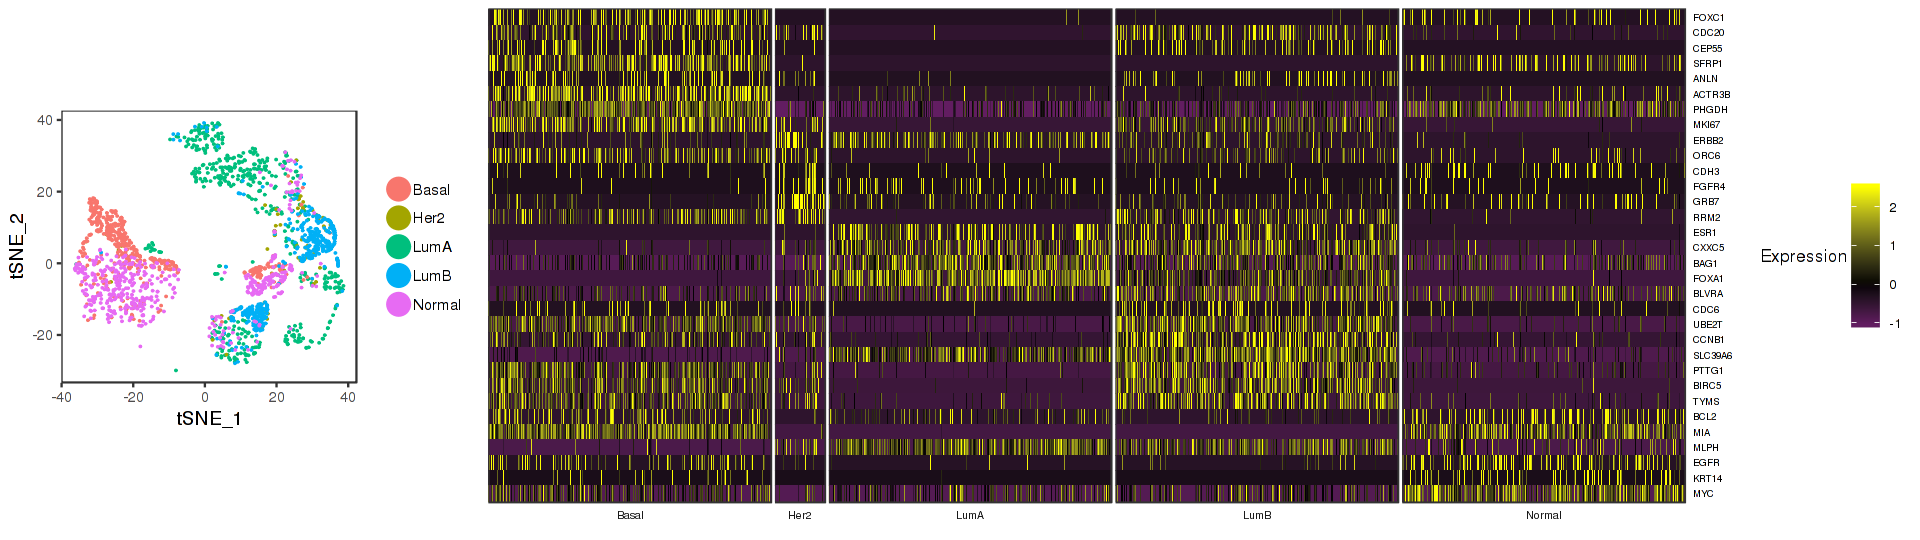

In [48]:
options(repr.plot.width = 16, repr.plot.height = 4.5)
cla_pam50_2=find_cla(cs,ident = "subtype_filt",ident_types=c("LumA","LumB","Her2","Basal","Normal"),s_name = "labels",s_types = c("Epithelial_cells","Epithelial_stem"),
                     wc=1,n=500,var_genes = pam50_weighted_genes[priority==1]$gene)
plot_grid(cla_pam50_2$tsne,cla_pam50_2$hm,rel_widths = c(1,3),ncol=2)

In [49]:
cla_pam50_2=find_cla(cs,ident = "subtype_filt",ident_types=c("LumA","LumB","Her2","Basal","Normal"),s_name = "labels",s_types = c("Epithelial_cells","Epithelial_stem"),
                     wc=1,n=500,var_genes = pam50_weighted_genes[priority>0.5]$gene)

Scaling data matrix


[1] "N variable genes: 37"
[1] "N cells: 2089"
[1] "accuracy before filtering = 0.959"
[1] "accuracy after filtering = 0.959"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.952"
[1] "% same cells = 0.288"
Neg. weight genes:
Number of genes: 37

In [50]:
cla_pam50_2=find_cla(cs,ident = "subtype_filt",ident_types=c("LumA","LumB","Her2","Basal","Normal"),s_name = "labels",s_types = c("Epithelial_cells","Epithelial_stem"),
                     wc=1,n=500,var_genes = pam50_weighted_genes[priority>0.2]$gene)

Scaling data matrix


[1] "N variable genes: 45"
[1] "N cells: 2089"
[1] "accuracy before filtering = 0.97"
[1] "accuracy after filtering = 0.97"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.963"
[1] "% same cells = 0.288"
Neg. weight genes:
Number of genes: 45

In [52]:
cla_pam50_2=find_cla(cs,ident = "subtype_filt",ident_types=c("LumA","LumB","Her2","Basal","Normal"),s_name = "labels",s_types = c("Epithelial_cells","Epithelial_stem"),
                     wc=1,n=500,var_genes = pam50_weighted_genes[priority>0]$gene)

Scaling data matrix


[1] "N variable genes: 50"
[1] "N cells: 2089"
[1] "accuracy before filtering = 0.969"
[1] "accuracy after filtering = 0.969"


Scaling data matrix


[1] "accuracy after filtering and different data = 0.965"
[1] "% same cells = 0.288"
Neg. weight genes: TMEM45B PGR
Number of genes: 50